In [0]:
import pandas  as pd
import numpy as np
df_sets = pd.read_csv("./koi_sets_unb.csv")
mask_train = (df_sets["Set"] == "Train").values
mask_test = (df_sets["Set"] == "Test").values
df_labels = pd.read_csv("./koi_labels.csv")
df_X = pd.read_csv("./koi_light_curves_X.csv")
df_labels_train = df_labels[mask_train]
df_labels_test = df_labels[mask_test]
df_X_train = df_X[mask_train]
df_X_test = df_X[mask_test]

In [0]:
y_train = ((df_labels_train["NExScI Disposition"]=="CONFIRMED")*1).values
y_test = ((df_labels_test["NExScI Disposition"]=="CONFIRMED")*1).values
df_X_train = df_X_train.reset_index(drop=True)
df_X_test = df_X_test.reset_index(drop=True)
df_X_train.fillna(df_X_train.median(), inplace=True)
df_X_test.fillna(df_X_test.median(), inplace=True)
X_train = df_X_train.values[:,1:]
X_test = df_X_test.values[:,1:]

> a) Explore los datos trabajados, ya sea con estadísticos simples o con gráficos como histogramas y/o boxplots. Comente sobre el problema enfrentado, es decir, la tarea de transformar un vector $X$ en un valor categórico (0 o 1).

In [6]:
import matplotlib.pyplot as plt
from pylab import boxplot
columns_names = df_X_train.columns[1:]
print(columns_names)
print(X_train.shape)
print(X_test.shape)

df_X_train.describe()

Index(['Minimum', 'Maximum', 'Mean', 'Std', 'IQR', 'Skew', 'Kurtosis', 'Q1',
       'Q2', 'Slope', 'Amplitude', 'MAD', 'Residual Bright Faint Ratio',
       'Median', 'Period', 'Time of Transit Epoch', 'First Transit Time (BJD)',
       'Impact Parameter', 'Duration', 'Transit Depth', 'r/R',
       'Fitted Stellar Density', 'Planet Radius', 'Semi-major Axis',
       'Inclination', 'Teq', 'Insolation Flux', 'a/R', 'Limb Darkening Coeff1',
       'Limb Darkening Coeff2', 'Limb Darkening Coeff3',
       'Limb Darkening Coeff4', 'Teff', 'log(g)', 'Metallicity',
       'Stellar Radius', 'Stellar Mass', 'Max single event sigma',
       'Max Multievent sigma', 'Transit Model SNR', 'KOI count'],
      dtype='object')
(4692, 41)
(1565, 41)


Minimum      Maximum         Mean          Std          IQR  \
count  4692.000000  4692.000000  4692.000000  4692.000000  4692.000000   
mean    -66.492676    23.987692    -0.142418     4.136842     0.333109   
std     274.391875   112.019945     0.501607    18.127797     2.060592   
min   -8446.637695     0.000000   -13.658888     0.000000     0.000000   
25%      -7.086795     0.167940    -0.028155     0.051691     0.002100   
50%      -1.620665     0.439595    -0.008431     0.105266     0.009035   
75%      -0.643782     2.028700    -0.002930     0.411105     0.028001   
max       0.000000  3780.657715     0.000000   686.443909    76.330341   

              Skew      Kurtosis           Q1           Q2         Slope  ...  \
count  4692.000000   4692.000000  4692.000000  4692.000000  4.692000e+03  ...   
mean     -9.386612    211.410321    -0.105753     0.017978  1.483853e-07  ...   
std       9.112166    539.593897     0.450513     0.366224  7.449019e-06  ...   
min    -117.225060     -3.000000   -11.479470    -1.961110 -1.280449e-04  ...   
25%     -11.797075     17.711536    -0.014000    -0.001772 -3.708501e-08  ...   
50%      -6.907724     58.183594    -0.003770     0.000000  0.000000e+00  ...   
75%      -3.781710    170.416851    -0.000190     0.000000  4.254584e-08  ...   
max      16.964659  16951.279152     5.092345    15.002840  1.998463e-04  ...   

       Limb Darkening Coeff4          Teff       log(g)  Metallicity  \
count                 4692.0   4692.000000  4692.000000  4692.000000   
mean                     0.0   5744.338875     4.296402    -0.132632   
std                      0.0    860.487363     0.457178     0.283833   
min                      0.0   2703.000000     0.047000    -1.980000   
25%                      0.0   5332.000000     4.192750    -0.280000   
50%                      0.0   5780.000000     4.432000    -0.100000   
75%                      0.0   6137.000000     4.539000     0.070000   
max                      0.0  15896.000000     5.274000     0.560000   

       Stellar Radius  Stellar Mass  Max single event sigma  \
count     4692.000000   4692.000000             4692.000000   
mean         1.900540      1.036185              287.105781   
std          7.311725      0.372291             1001.727968   
min          0.118000      0.000000                2.539000   
25%          0.832750      0.849000                4.317000   
50%          1.001000      0.974000                6.592500   
75%          1.392000      1.107000               52.505750   
max        229.908000      3.735000            22982.162000   

       Max Multievent sigma  Transit Model SNR    KOI count  
count           4692.000000        4692.000000  4692.000000  
mean            1676.133027         433.699680     1.460358  
std             5421.050203        1052.012721     0.950673  
min                7.105000           0.000000     1.000000  
25%               13.582000          18.300000     1.000000  
50%               27.682000          39.100000     1.000000  
75%              272.439000         201.150000     2.000000  
max           120049.680000        9054.700000     7.000000  

[8 rows x 41 columns]

In [0]:
sum(y_train)/len(y_train)

0.37851662404092073

In [0]:
import matplotlib.pyplot as plt
from pylab import boxplot

for i in columns_names:
  df_X_train[[i]].boxplot()


Minimum


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f50aebfdc80> (for post_execute):


KeyboardInterrupt: ignored

Se trata de un problema de clasificación binario.

El primer paso es entender con que se esta trabajando, en este caso cada dato es el resultados estadístico de una serie de mediciones sobre un Koi, el que puede o no ser un exoplaneta (1 o 0). No sabemos que datos son relevantes a priorí para el problema, por un lado, los outliers pueden ser errores de medición o justamente las anomalías que comprueban la precensia de un exoplaneta. Para un ccorrecto preprocesamiento de los datos habría que entender mejor la importancia y cuales son los rangos posibles de sus atributos.

Notamos que hay 39 atributos continuos y 2 atributos discretos. 


> b) Escale los datos para ser trabajados por el modelo de aprendizaje, indique la importancia de éste paso. Además cree un conjunto de validación extrayendo un cierto porcentaje del conjunto de entrenamiento, por ejemplo el 20% manteniendo el desbalanceo de clases (*split* stratificado).

In [0]:
from sklearn.preprocessing import StandardScaler
#help(StandardScaler)

Continuando con el proprocesamiento de los datos.
El escalamiento de los datos es importante ya que permite que que el orden de las mediciones de una característica no desbalancee el aprendizaje en comparación a otras. Para esto vamos a usar MinMaxScaler, pues más adelante tuvimos un problema producto del escalamiento de los datos, donde la red neuronal no aprendía.

Que la particioón sea balanceada quiere decir que la representación de las clases es similar en los conjuntos de entrenamiento y validación. Guardamos el 20% de los datos de entrenamiento para la validación.

Partimos los datos antes de hacer el escalamiento, ya que si se hace, el conjunto de validación esta siendo influenciado por el conjunto de testeo.

Una alternativa que habría sido interesante de probar, es usar RobusSclare. Lo más probable es que ignorara los outlieres quitandoles relevancia, pero habría sido interesante ver que aprendería el modelo.

In [8]:
#USAMOS MIN MAX
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
mms=MinMaxScaler()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, stratify=y_train)
mms.fit(X_train)
mms.fit(X_val)
X_train_scaled = mms.transform(X_train)
X_val_scaled = mms.transform(X_val)

X_test_scaled =  mms.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
np.max(X_val_scaled)

1.0000000000000002

> c) Muestre en un gráfico la función objetivo (*cross entropy*) para el conjunto de entrenamiento y de validación *vs* número de *epochs* de entrenamiento, para una red *feedforward* de 3 capas, con 256 unidades ocultas y función de activación sigmoidal. Entrene la red usando gradiente descendente estocástico con tasa de aprendizaje (*learning rate*) 0.01 y 100 *epochs* de entrenamiento. Comente. Si observa divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento. Compare el efecto de variar la función de activación a **ReLU** ¿Qué observa en la convergencia del modelo?

In [10]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD,Adam

Using TensorFlow backend.


In [0]:

print(np.min(X_train_scaled))
print(np.max(X_train_scaled))

E=150

model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1],kernel_initializer='uniform', activation="sigmoid"))
model.add(Dense(1,kernel_initializer='uniform', activation="sigmoid")) #this should be mantained
model.compile(optimizer=SGD(lr=0.01),loss='binary_crossentropy', metrics = ['accuracy'])
hist = model.fit(X_train_scaled, y_train, epochs=E, verbose=0, validation_data=(X_val_scaled, y_val))
#Tomamos kernel uniforme debido al teorema del límite central

-2.2895625552021173
15.495614765803504
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [0]:
model1 = Sequential()
model1.add(Dense(256, input_dim=X_train_scaled.shape[1],kernel_initializer='uniform', activation="relu"))
model1.add(Dense(1,kernel_initializer='uniform', activation="sigmoid")) #this should be mantained
print(y_train[:10])
model1.compile(optimizer=SGD(lr=0.01),loss='binary_crossentropy', metrics= ['accuracy'])
hist1 = model1.fit(X_train_scaled, y_train, epochs=E, verbose=0, validation_data=(X_val_scaled, y_val))

[0 1 0 0 1 0 1 0 1 0]
[0 1 0 0 1 0 1 0 1 0]


Text(0, 0.5, 'Losses')

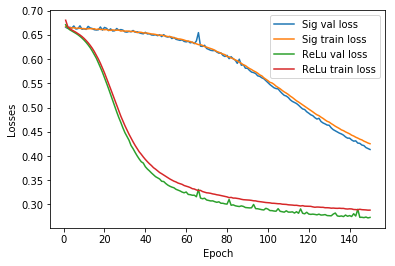

In [0]:
#Ploteo de las pérdidas vs los epoch
#Los saltos mostrados en el gráfico se deben a que algunas configuraciones de NN pueden no ser tan buena para los puntos de validación pero a la larga ambas tienden a descender.
plt.plot(np.arange(1 ,E+1, 1),hist.history['val_loss'])
plt.plot(np.arange(1,E+1,1), hist.history['loss'])
plt.plot(np.arange(1 , E+1, 1),hist1.history['val_loss'])
plt.plot(np.arange(1,E+1,1), hist1.history['loss'])
plt.legend(['Sig val loss','Sig train loss','ReLu val loss','ReLu train loss'])
plt.xlabel('Epoch')
plt.ylabel('Losses')

Text(0, 0.5, 'Losses')

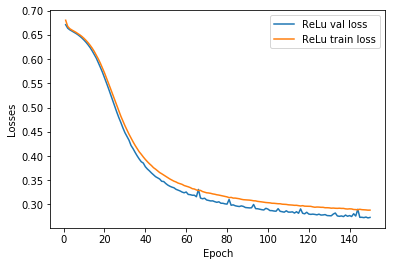

In [0]:
plt.plot(np.arange(1 , E+1, 1),hist1.history['val_loss'])
plt.plot(np.arange(1,E+1,1), hist1.history['loss'])
plt.legend(['ReLu val loss','ReLu train loss'])
plt.xlabel('Epoch')
plt.ylabel('Losses')

Text(0, 0.5, 'Accuracy')

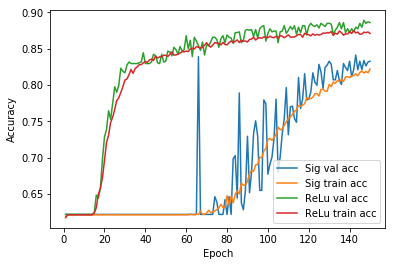

In [0]:
plt.plot(np.arange(1 , E+1, 1),hist.history['val_acc'])
plt.plot(np.arange(1,E+1,1), hist.history['acc'])
plt.plot(np.arange(1 , E+1, 1),hist1.history['val_acc'])
plt.plot(np.arange(1,E+1,1), hist1.history['acc'])
plt.legend(['Sig val acc','Sig train acc','ReLu val acc','ReLu train acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


Incluimos la metrica de accuracy ya que el valor de cross entropy no nos da ninguna información directa sobre el desempeño del modelo. Se puede ver que para el accuracy usando una función de activación Relu mejora con un menor número de epoch, (arpoximadamente 20) y llega a tener un desempeño consistentemente que el modelo sigmoidal. 

Esto concuerda con los aprendido en el curso, en este caso su utilidad no se debe a que evita el desvanecimiento de los gradiente, ya no estamos trabajando ocn una red profunda. Su mejor desempeño puede deberse a que permite una configuración más "sparse" (dispersa). 

Ademas el desempeño del modelo sobre el conjunto de validación es mas "estable" con el modelo Relu.

> Finalmente compare a través de una métrica de desempeño sobre el conjunto de pruebas, en este caso como trabajamos un problema desbalanceado, mida *f1 score weighted*, comente sobre esta decisión ¿Es esperable la diferencia entre relu y sigmoidal en base a los gráficos realizados?

In [0]:
from sklearn.metrics import f1_score
a=f1_score(y_test,model.predict_classes(X_test_scaled),average='weighted')
b=f1_score(y_test,model1.predict_classes(X_test_scaled),average='weighted')
print('Model Sigmoidal=',(a))
print('Model Relu=',(b))
print('Diferencia=',(a-b))


Model Sigmoidal= 0.8039955521862902
Model Relu= 0.8405807242317157
Diferencia= -0.03658517204542555


F1 calcula considera tanto el recall como la precición del modelo con igual peso. 

Como las clasificaciones no están balanceadas, una red ingenua tiende a sobre-aprender el No exoplaneta. Por lo tanto, usamos f1 balancea sobre los conjuntos para que se castiguen los falso positivos, considerando el recall y la precicion de acuerdo a la distribución de las etiquetas. Los resultados son concluyentes con los esperado, aunque la diferencia fue menor a la esperada, quizas con un ajuste de parámetros se logre un mejor desempeño.



> d) Repita c) variando la tasa de aprendizaje (*learning rate*) en un rango sensible. Comente. Si observa divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento o para alguna de las dos funciones de activación experimentadas.

In [0]:
#Variación tasa aprendizaje

Rel= []
minrel = 0
ind_re = 0
Sig= []
min_sig = 0
ind_sig = 0


from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
n_lr=20
alma={}
lear_rate=np.linspace(0,1,n_lr)
    
for i in lear_rate:    
    model_sig2 = Sequential()
    model_sig2.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
    model_sig2.add(Dense(1, kernel_initializer='uniform',activation="sigmoid")) #this should be mantained
    
    model_sig2.compile(optimizer=SGD(lr=i),loss='binary_crossentropy',metrics = ['accuracy']) 
    alma['hist_sig'+str(i)] = model_sig2.fit(X_train_scaled, y_train, epochs=100, verbose=0, validation_data=(X_val_scaled, y_val))
    
    model_relu2 =Sequential()
    model_relu2.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
    model_relu2.add(Dense(1, kernel_initializer='uniform',activation="sigmoid")) #this should be mantained0
    
    model_relu2.compile(optimizer=SGD(lr=i),loss='binary_crossentropy',metrics = ['accuracy']) 
    alma['hist_relu'+str(i)] = model_sig2.fit(X_train_scaled, y_train, epochs=100, verbose=0, validation_data=(X_val_scaled, y_val))
    
    Rel.append(alma['hist_relu'+str(i)].history['val_loss'][99])
    minrel=min(Rel)
    if minrel == alma['hist_relu'+str(i)].history['val_loss'][99]:
        ind_re = i
        
    Sig.append(alma['hist_sig'+str(i)].history['val_loss'][99])
    min_sig=min(Sig)
    if min_sig == alma['hist_sig'+str(i)].history['val_loss'][99]:
        ind_sig = i
 
print(min(Sig))
print(ind_sig)
print(min(Rel))
print(ind_re)

model_sig2 = Sequential()
model_sig2.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model_sig2.add(Dense(1, kernel_initializer='uniform',activation="sigmoid")) #this should be mantained
    

model_relu2 =Sequential()
model_relu2.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model_relu2.add(Dense(1, kernel_initializer='uniform',activation="sigmoid")) #this should be mantained0

model_sig2.compile(optimizer=SGD(lr=ind_sig),loss='binary_crossentropy',metrics = ['accuracy'])
model_sig2.fit(X_train_scaled, y_train, epochs=100, verbose=0, validation_data=(X_val_scaled, y_val))

model_relu2.compile(optimizer=SGD(lr=ind_re),loss='binary_crossentropy',metrics = ['accuracy'])
model_sig2.fit(X_train_scaled, y_train, epochs=100, verbose=0, validation_data=(X_val_scaled, y_val))


Train on 3753 samples, validate on 939 samples
Epoch 1/100
3753/3753 [==============================] - 0s 108us/step - loss: 0.6636 - acc: 0.6214 - val_loss: 0.6633 - val_acc: 0.6219
Epoch 2/100
3753/3753 [==============================] - 0s 41us/step - loss: 0.6636 - acc: 0.6214 - val_loss: 0.6633 - val_acc: 0.6219
Epoch 3/100
3753/3753 [==============================] - 0s 42us/step - loss: 0.6636 - acc: 0.6214 - val_loss: 0.6633 - val_acc: 0.6219
Epoch 4/100
3753/3753 [==============================] - 0s 42us/step - loss: 0.6636 - acc: 0.6214 - val_loss: 0.6633 - val_acc: 0.6219
Epoch 5/100
3753/3753 [==============================] - 0s 40us/step - loss: 0.6636 - acc: 0.6214 - val_loss: 0.6633 - val_acc: 0.6219
Epoch 6/100
3753/3753 [==============================] - 0s 42us/step - loss: 0.6636 - acc: 0.6214 - val_loss: 0.6633 - val_acc: 0.6219
Epoch 7/100
3753/3753 [==============================] - 0s 41us/step - loss: 0.6636 - acc: 0.6214 - val_loss: 0.6633 - val_acc: 0.6219


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.157962). Check your callbacks.
  % delta_t_median)


3753/3753 [==============================] - 0s 46us/step - loss: 0.2700 - acc: 0.8777 - val_loss: 0.3046 - val_acc: 0.8679
Epoch 91/100
3753/3753 [==============================] - 0s 45us/step - loss: 0.2715 - acc: 0.8790 - val_loss: 0.2572 - val_acc: 0.8935
Epoch 92/100
3753/3753 [==============================] - 0s 45us/step - loss: 0.2651 - acc: 0.8854 - val_loss: 0.3960 - val_acc: 0.8062
Epoch 93/100
3753/3753 [==============================] - 0s 45us/step - loss: 0.2698 - acc: 0.8804 - val_loss: 0.2449 - val_acc: 0.8935
Epoch 94/100
3753/3753 [==============================] - 0s 44us/step - loss: 0.2736 - acc: 0.8812 - val_loss: 0.2650 - val_acc: 0.8871
Epoch 95/100
3753/3753 [==============================] - 0s 45us/step - loss: 0.2679 - acc: 0.8801 - val_loss: 0.2641 - val_acc: 0.8882
Epoch 96/100
3753/3753 [==============================] - 0s 45us/step - loss: 0.2698 - acc: 0.8796 - val_loss: 0.2435 - val_acc: 0.8978
Epoch 97/100
3753/3753 [==============================

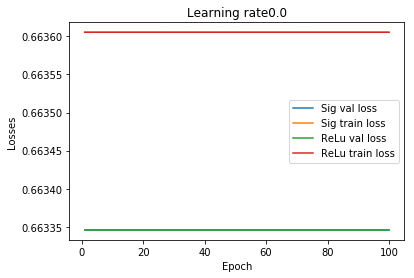

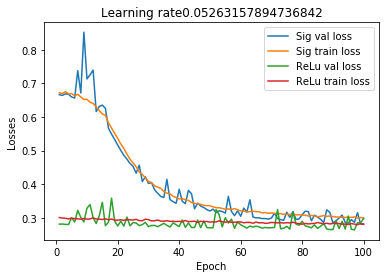

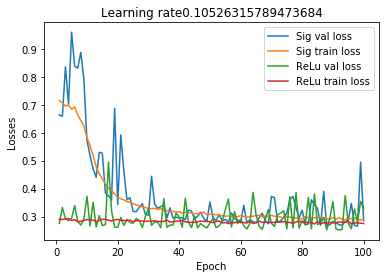

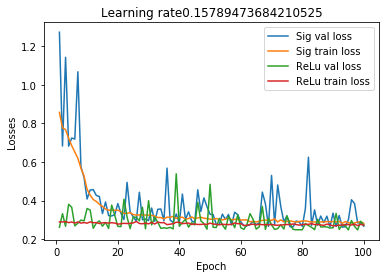

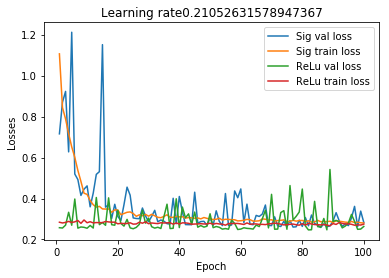

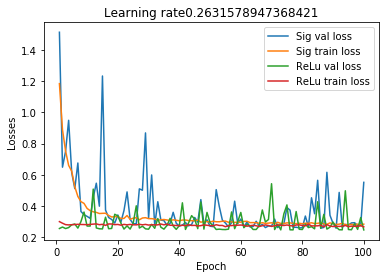

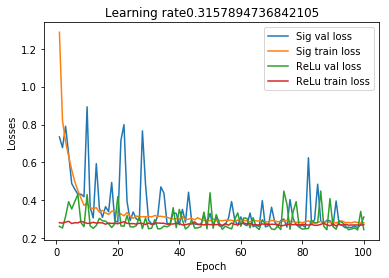

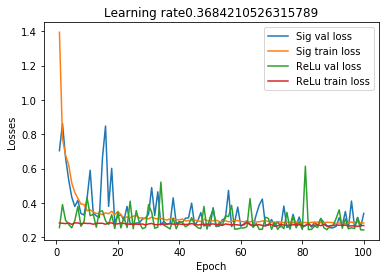

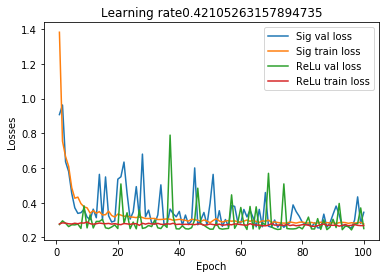

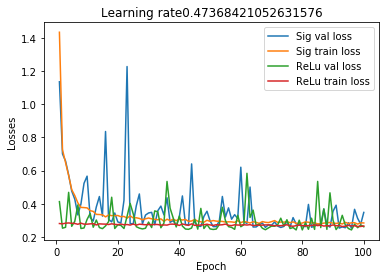

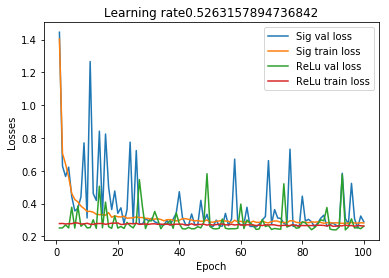

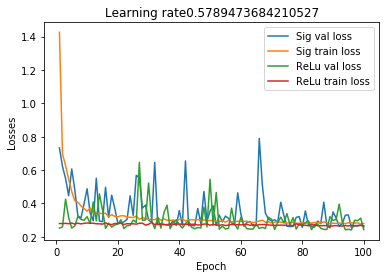

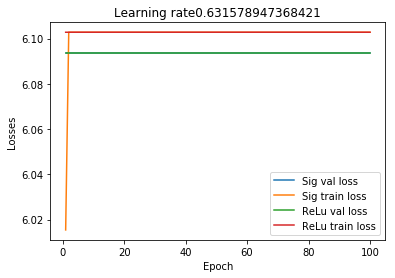

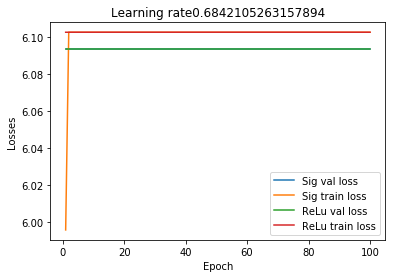

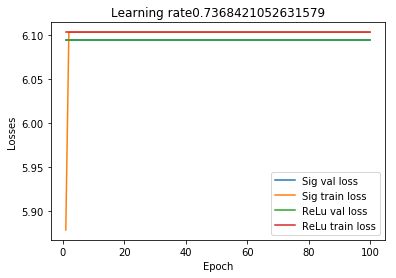

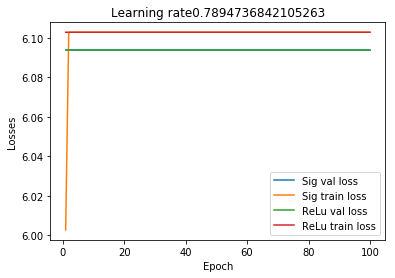

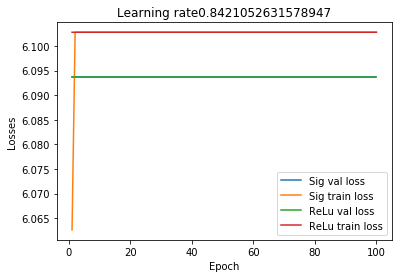

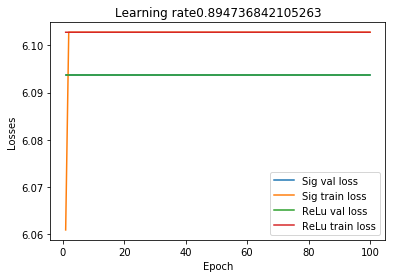

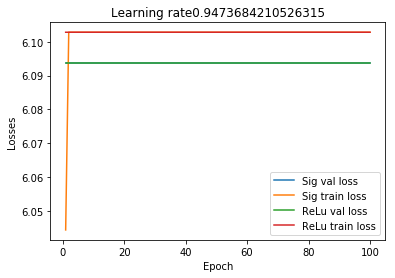

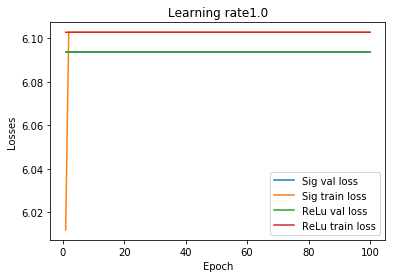

In [0]:
for i in lear_rate:
    plt.plot(np.arange(1,101,1),alma['hist_sig'+str(i)].history['val_loss'])
    plt.plot(np.arange(1,101,1),alma['hist_sig'+str(i)].history['loss'])
    plt.plot(np.arange(1,101,1),alma['hist_relu'+str(i)].history['val_loss'])
    plt.plot(np.arange(1,101,1),alma['hist_relu'+str(i)].history['loss'])
    plt.legend(['Sig val loss','Sig train loss','ReLu val loss','ReLu train loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Losses')
    plt.title('Learning rate' + str(i))
    
    plt.show()

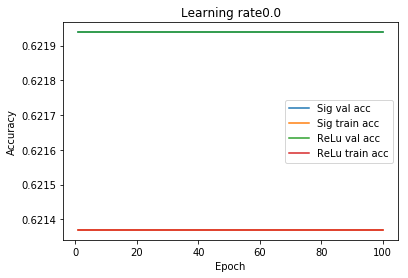

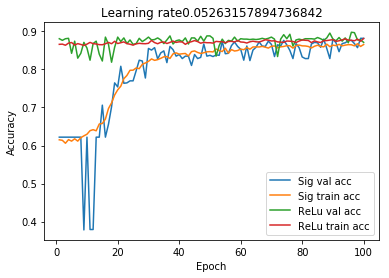

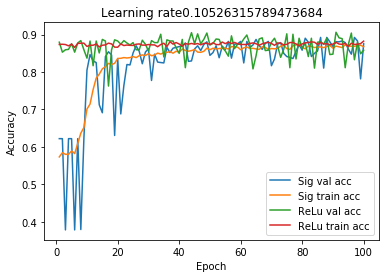

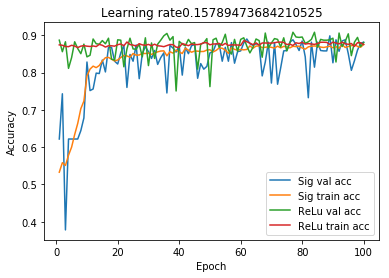

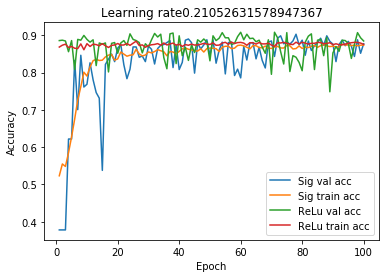

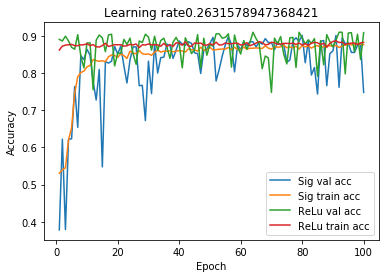

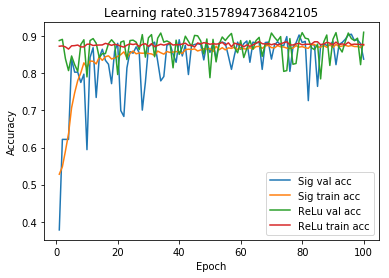

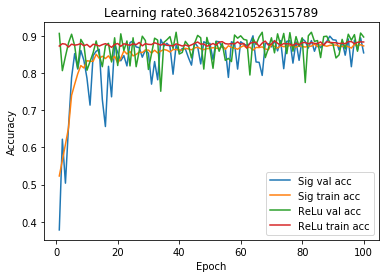

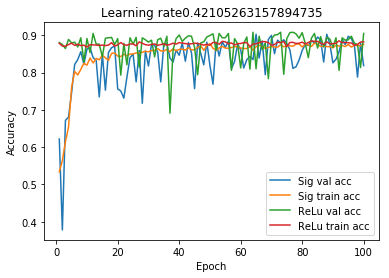

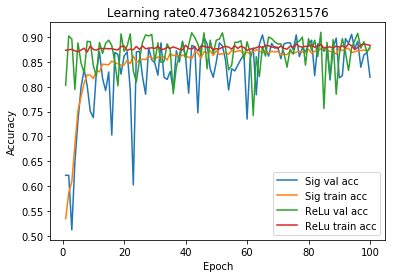

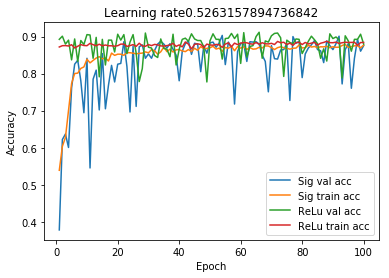

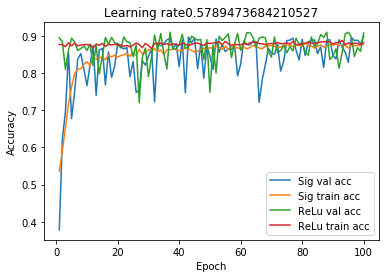

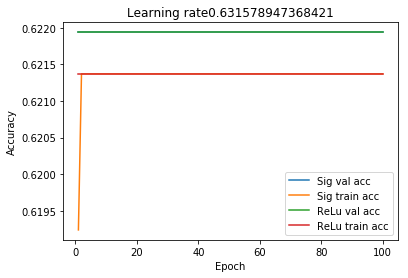

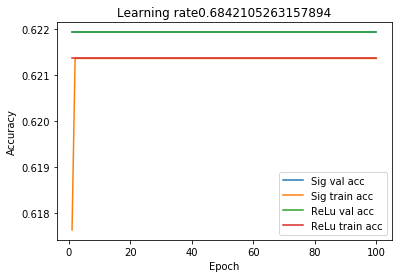

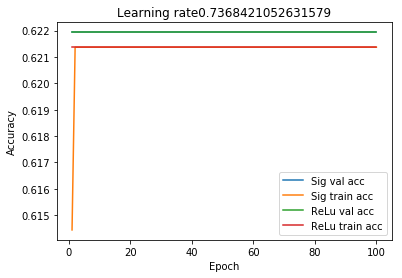

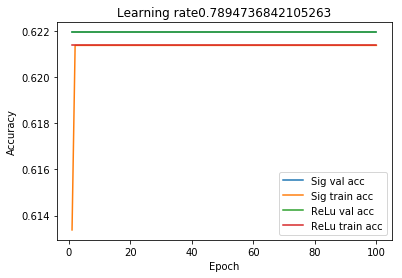

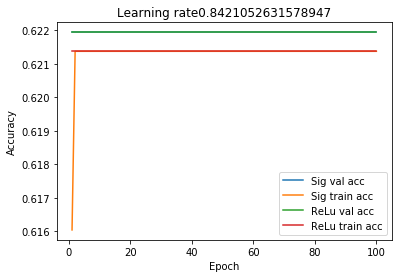

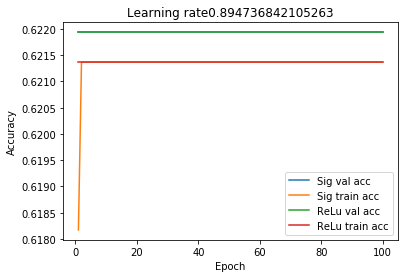

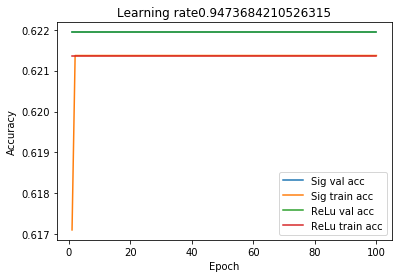

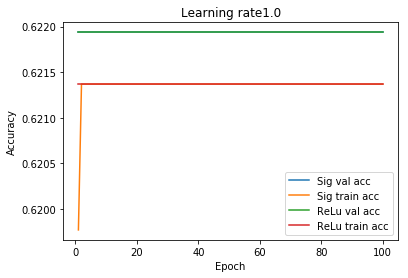

In [0]:
for i in lear_rate:
    plt.plot(np.arange(1,101,1),alma['hist_sig'+str(i)].history['val_acc'])
    plt.plot(np.arange(1,101,1),alma['hist_sig'+str(i)].history['acc'])
    plt.plot(np.arange(1,101,1),alma['hist_relu'+str(i)].history['val_acc'])
    plt.plot(np.arange(1,101,1),alma['hist_relu'+str(i)].history['acc'])
    plt.legend(['Sig val acc','Sig train acc','ReLu val acc','ReLu train acc'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Learning rate' + str(i))
    
    plt.show()

Obviamente cuando el learning rate es 0 no hay aprendizaje, pero cuando es muy grande tampoco hay mejoría, específicamente desde 0.57 aproximadamente.
Se puede ver que a medida que aumenta el learning rate, la accuracy para el conjunto de validación llega cercana al 90%  de forma más rápida. Además ambos modelos convergen a un desempeño similar.

El modelo que utiliza Relu no parece ser afectado por el learning rate mientras se logre un aprendizaje.



In [0]:
from sklearn.metrics import f1_score   
a=f1_score(y_test,model_sig2.predict_classes(X_test_scaled),average='weighted')
b=f1_score(y_test,model_relu2.predict_classes(X_test_scaled),average='weighted')
print('ind_sig: ',ind_sig)
print('ind_re: ',ind_re)
print('Model Sigmoidal=',(a))
print('Model Relu=',(b))
print('Diferencia=',(a-b))

ind_sig:  0.5789473684210527
ind_re:  0.5789473684210527
Model Sigmoidal= 0.8413510094240338
Model Relu= 0.5470135402403773
Diferencia= 0.29433746918365655


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Buscamos los learning rates que entregaban un mejor desempeño segun la función de perdida, y luego los evaluamos según el F1 score. Como resultado, tenemos que el modelo sigmoidal con un learning rate de 0.57 aprox,  tuvo el mejor desempeño que para el del modelo sigmoidal con un Ler_r de 0.57. Notemos que Su F1_score fue menor que el dado en b, esto se puede deber a que nuestro modelo se enfoca en reducir la perdia de entropia binaria, lo que no implica directamente una mejora en su score.
El hecho de que Relu entregue un resultado tan bajo puede deberse a que sufre de overfitting, una alternativa sería usar menos epoch.
Una forma de elegir un mejor Ler_r habría sido reducir el rango de busqueda, de 0-1 a 0-0,5 con más particiones entre medio, y usando los modelso con mejor accuracy considerando los últimos 5 epoch de validación.

Cada vez que el se corren los modelos cambian los desempeños, lo anterior expresa un análisis, incluso, este hecho apoya la idea de que para elegir un parámetro es necesario un mejor criterio que simplemente el que termina con menor perdida para el conjunto de validación. Una opción que se puede aplicar a todos los modelos es reducir el número de epoch acorde al punto donde se estanca la mejora. Otra alternativa es no elegir el valor del parámetro que de una mejor salida en el conjunto de validación, sinó el que de los mejores 10 últimos resultados, o considerar un promedio al correr el modelo más veces.

Estos criterios para ajustar los parámetros son validos para todo los casos siguientes.

Ademas el resultado de Relu sigue siendo malo pese a tener una perdida baja. Se debe esta incurriendo en overfitting.

> e) Entrene los modelos considerados en c) usando *progressive decay*. Compare y comente.

In [0]:
#DECAIMIENTO 
Rel= []
minrel = 0
ind_re = 0
Sig= []
min_sig = 0
ind_sig = 0

n_decay = 10
lear_decay = np.logspace(-6,0,n_decay)
a={}
for i in lear_decay:
    sgd = SGD(lr=0.2, decay=i)
    model=Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1],kernel_initializer='uniform', activation="sigmoid"))
    model.add(Dense(1,kernel_initializer='uniform', activation="sigmoid")) #this should be mantained
    model.compile(optimizer=sgd,loss='binary_crossentropy',metrics = ['accuracy'])
    hist_sig = model.fit(X_train_scaled, y_train, epochs=100, verbose=0, validation_data=(X_val_scaled, y_val))
    a['decay_sig'+str(i)]=hist_sig
    
    
    model=Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1],kernel_initializer='uniform', activation="relu"))
    model.add(Dense(1,kernel_initializer='uniform', activation="sigmoid")) #this should be mantained
    model.compile(optimizer=sgd,loss='binary_crossentropy',metrics = ['accuracy'])
    hist_relu = model.fit(X_train_scaled, y_train, epochs=100, verbose=0, validation_data=(X_val_scaled, y_val))
    a['decay_relu'+str(i)]=hist_relu
    
    
    Rel.append(a['decay_relu'+str(i)].history['val_loss'][99])
    minrel=min(Rel)
    if minrel == a['decay_relu'+str(i)].history['val_loss'][99]:
        ind_re = i
        
    Sig.append(a['decay_sig'+str(i)].history['val_loss'][99])
    min_sig=min(Sig)
    if min_sig == a['decay_sig'+str(i)].history['val_loss'][99]:
        ind_sig = i
 
print(min(Sig))
print(ind_sig)
print(min(Rel))
print(ind_re)

model_sig3 = Sequential()
model_sig3.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model_sig3.add(Dense(1, kernel_initializer='uniform',activation="sigmoid")) #this should be mantained
    

model_relu3 =Sequential()
model_relu3.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model_relu3.add(Dense(1, kernel_initializer='uniform',activation="sigmoid")) #this should be mantained0

model_sig3.compile(optimizer=SGD(lr=0.2, decay=ind_sig),loss='binary_crossentropy',metrics = ['accuracy'])
model_sig3.fit(X_train_scaled, y_train, epochs=100, verbose=0, validation_data=(X_val_scaled, y_val))

model_relu3.compile(optimizer=SGD(lr=0.2, decay=ind_re),loss='binary_crossentropy',metrics = ['accuracy'])
model_sig3.fit(X_train_scaled, y_train, epochs=100, verbose=0, validation_data=(X_val_scaled, y_val))

0.27254822869270373
4.641588833612782e-06
0.28225225943345994
0.00046415888336127773
Train on 3753 samples, validate on 939 samples
Epoch 1/100
3753/3753 [==============================] - 2s 579us/step - loss: 1.0843 - acc: 0.5201 - val_loss: 0.9079 - val_acc: 0.3781
Epoch 2/100
3753/3753 [==============================] - 0s 51us/step - loss: 0.8014 - acc: 0.5588 - val_loss: 0.8481 - val_acc: 0.6219
Epoch 3/100
3753/3753 [==============================] - 0s 51us/step - loss: 0.8383 - acc: 0.5382 - val_loss: 1.1198 - val_acc: 0.3781
Epoch 4/100
3753/3753 [==============================] - 0s 49us/step - loss: 0.7373 - acc: 0.5753 - val_loss: 0.9946 - val_acc: 0.6219
Epoch 5/100
3753/3753 [==============================] - 0s 50us/step - loss: 0.6986 - acc: 0.5881 - val_loss: 0.6485 - val_acc: 0.6219
Epoch 6/100
3753/3753 [==============================] - 0s 51us/step - loss: 0.6366 - acc: 0.6552 - val_loss: 0.6332 - val_acc: 0.6219
Epoch 7/100
3753/3753 [============================

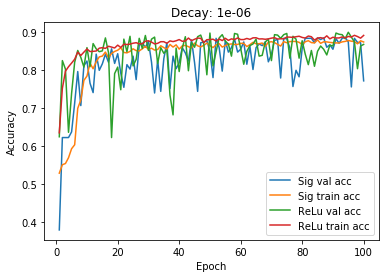

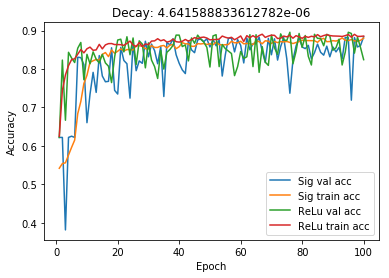

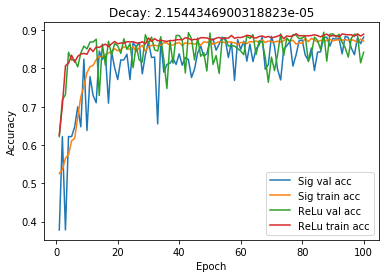

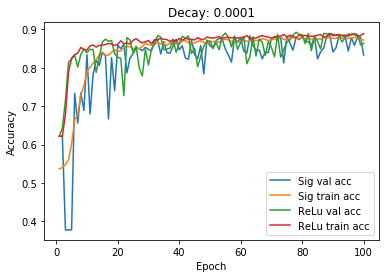

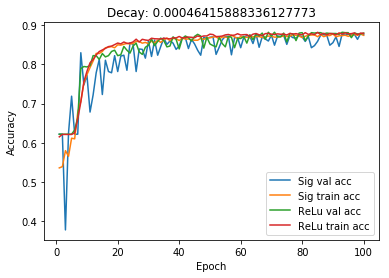

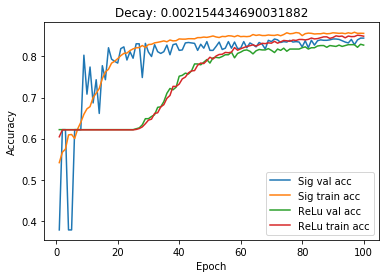

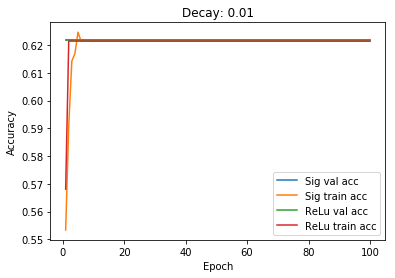

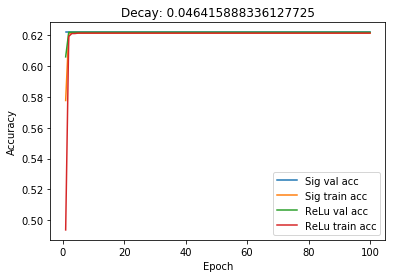

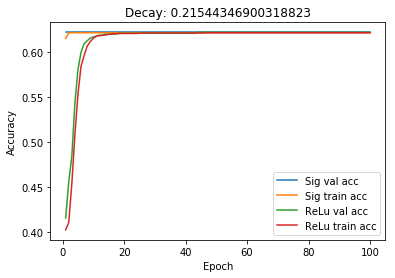

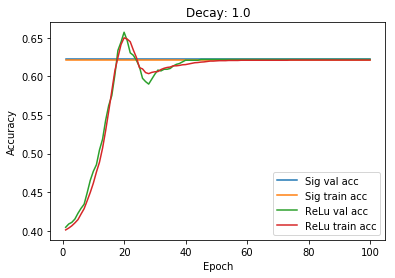

In [0]:
for i in lear_decay:    
    plt.plot(np.arange(1,101,1), a['decay_sig'+str(i)].history['val_acc'])
    plt.plot(np.arange(1,101,1), a['decay_sig'+str(i)].history['acc'])
    plt.plot(np.arange(1,101,1),a['decay_relu'+str(i)].history['val_acc'])
    plt.plot(np.arange(1,101,1),a['decay_relu'+str(i)].history['acc'])
    plt.legend(['Sig val acc','Sig train acc','ReLu val acc','ReLu train acc'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Decay: '+  str(i))
    plt.show()
        

In [0]:
a=f1_score(y_test,model_sig3.predict_classes(X_test_scaled),average='weighted')
b=f1_score(y_test,model_relu3.predict_classes(X_test_scaled),average='weighted')
print('learing deacy')
print('ind_sig: ',ind_sig)
print('ind_re: ',ind_re)
print('Model Sigmoidal=',(a))
print('Model Relu=',(b))
print('Diferencia=',(a-b))

learing deacy
ind_sig:  4.641588833612782e-06
ind_re:  0.00046415888336127773
Model Sigmoidal= 0.7790409051545878
Model Relu= 0.5420607212438633
Diferencia= 0.2369801839107245


Para decaimientos bajos los modelos con las dos funciones de activación funcionan de forma similar, Relu sigue manteniendo una convergencia más rapida.

En este caso el modelo sigmoidal con un learning rate de 4,6e-06 logra un score de 0.78, lo que es un resultado bueno para este modelo, pero sigue siendo menor a los desempeños anteriores.  Además con los gráficos se puede ver que el accuracy obtenido llega al 90% para los mejores resultados, lo que se contradice con el resultado de f1_score de Relu. 
El modelo resultante para Relu es malo, obviamente cae en overfitting. Quizas la velocidad de convergencia al usar Relu afecta negativamente al modelo al tener tantos más epochs.

En general un learning rate bajo implica una convergencia más rápida, por otro lado el accuracy logrado es similar para todos los learning rate en particular los que son de orden menor a 4e-4.

No sabríamos explicar que pasa con el decay 1, no debería haber aprendizaje por lo que entendemos de la librería.




> f) Entrene los modelos considerados en c) usando *momentum* [[3]](#refs). Experimente usando *momentum* clásico y *momentum* de Nesterov. ¿Observa un mejor resultado final? ¿Observa una mayor velocidad de convergencia sobre el conjunto de entrenamiento? ¿Sobre el conjunto de validación?

In [12]:
#MOMENTUM SIN NESTEROV

Rel= []
minrel = 0
ind_re = 0
Sig= []
min_sig = 0
ind_sig = 0


split_space = 21
momentum = np.linspace(0,1,split_space)
sin_nest={}
for m in momentum:
    sgd = SGD(lr=0.01,momentum=m,nesterov=False)
    model=Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1],kernel_initializer='uniform', activation="sigmoid"))
    model.add(Dense(1,kernel_initializer='uniform', activation="sigmoid")) #this should be mantained
    model.compile(optimizer=sgd,loss='binary_crossentropy', metrics = ['accuracy'])
    hist = model.fit(X_train_scaled, y_train, epochs=100, verbose=0, validation_data=(X_val_scaled, y_val))
    sin_nest['rango_sig'+str(m)]=hist

    model=Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1],kernel_initializer='uniform', activation="relu"))
    model.add(Dense(1,kernel_initializer='uniform', activation="sigmoid")) #this should be mantained
    model.compile(optimizer=sgd,loss='binary_crossentropy', metrics = ['accuracy'])
    hist = model.fit(X_train_scaled, y_train, epochs=100, verbose=0, validation_data=(X_val_scaled, y_val))
    sin_nest['rango_relu'+str(m)]=hist    
    
    
    Rel.append(sin_nest['rango_relu'+str(m)].history['val_loss'][99])
    minrel=min(Rel)
    if minrel == sin_nest['rango_relu'+str(m)].history['val_loss'][99]:
        ind_re = m
        
    Sig.append(sin_nest['rango_sig'+str(m)].history['val_loss'][99])
    min_sig=min(Sig)
    if min_sig == sin_nest['rango_sig'+str(m)].history['val_loss'][99]:
        ind_sig = m
        
    
print(min(Sig))
print(ind_sig)
print(min(Rel))
print(ind_re)

model_sig4 = Sequential()
model_sig4.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model_sig4.add(Dense(1, kernel_initializer='uniform',activation="sigmoid")) #this should be mantained
    

model_relu4 =Sequential()
model_relu4.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model_relu4.add(Dense(1, kernel_initializer='uniform',activation="sigmoid")) #this should be mantained0

model_sig4.compile(optimizer=SGD(lr=0.01,momentum=ind_sig,nesterov=False),loss='binary_crossentropy',metrics = ['accuracy'])
model_sig4.fit(X_train_scaled, y_train, epochs=100, verbose=0, validation_data=(X_val_scaled, y_val))

model_relu4.compile(optimizer=SGD(lr=0.01,momentum=ind_re,nesterov=False),loss='binary_crossentropy',metrics = ['accuracy'])
model_sig4.fit(X_train_scaled, y_train, epochs=100, verbose=0, validation_data=(X_val_scaled, y_val))    

0.27350294637603884
0.9500000000000001
0.25600710603248833
0.9


0.27167118255830547
0.9500000000000001
0.258836655920179
0.8500000000000001


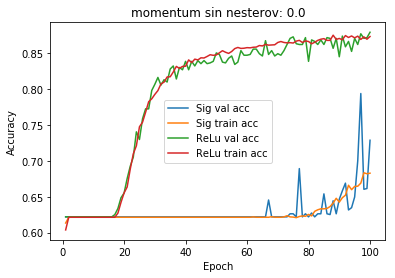

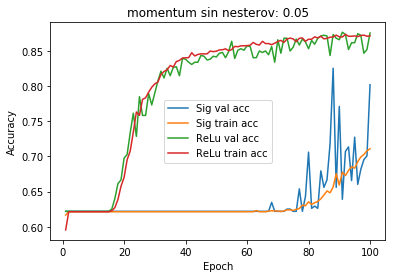

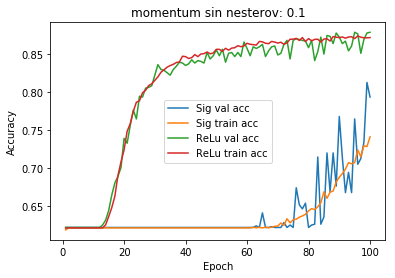

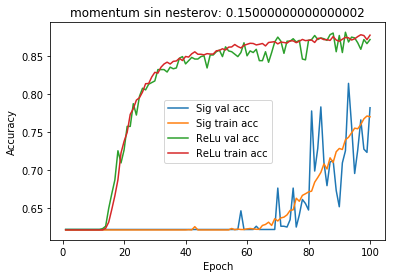

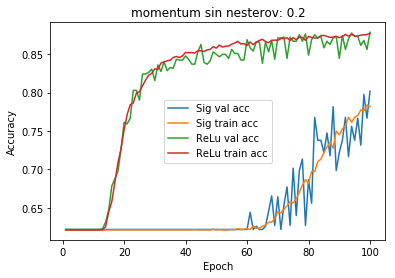

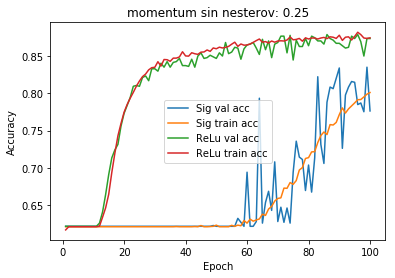

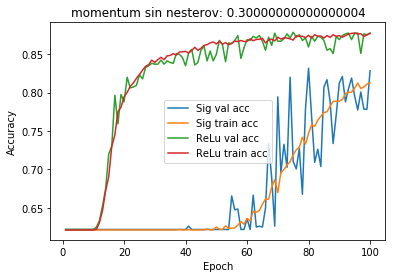

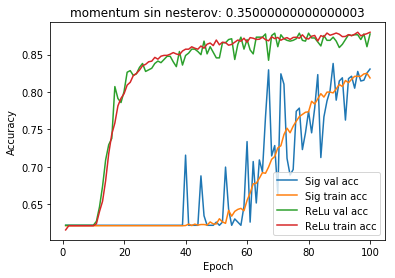

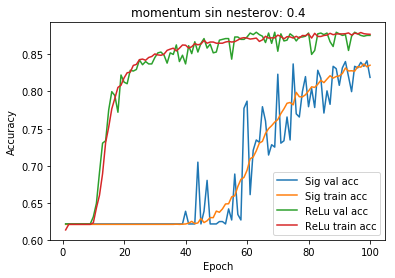

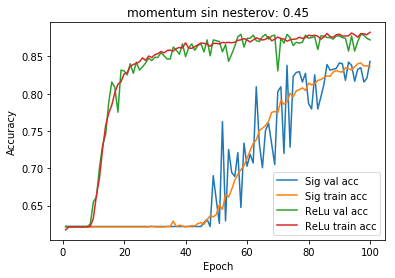

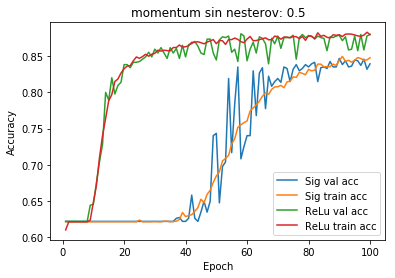

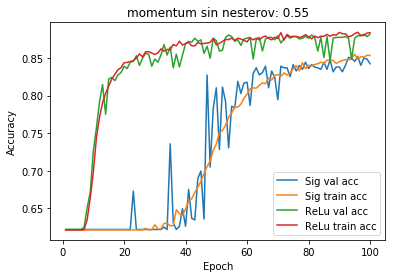

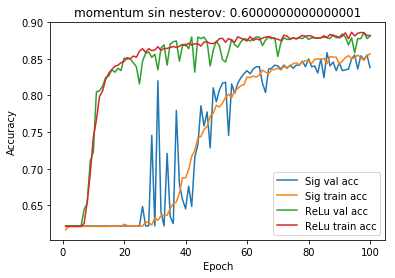

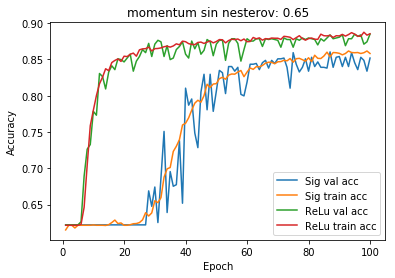

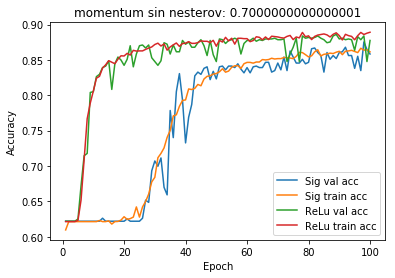

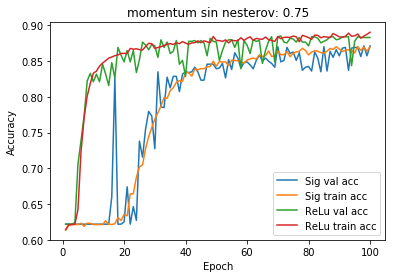

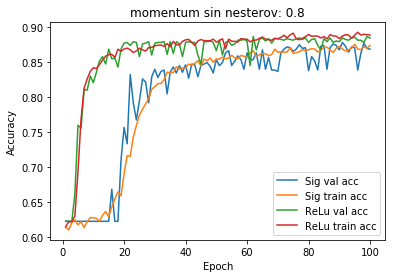

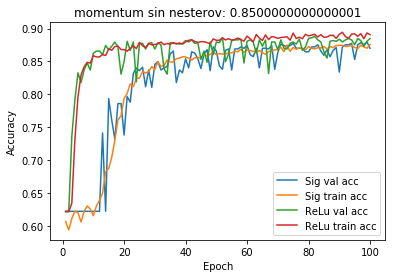

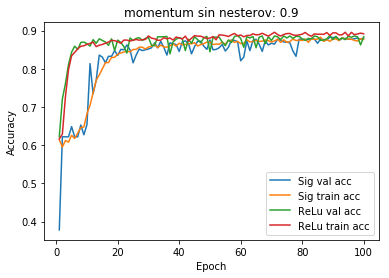

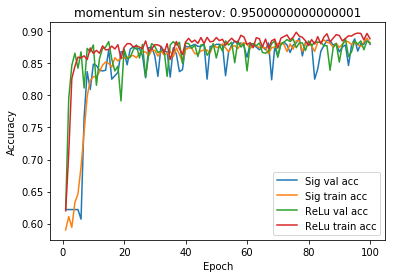

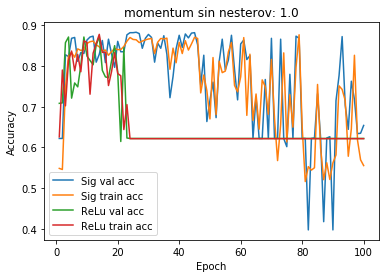

In [13]:
for m in momentum:    
    plt.plot(np.arange(1,101,1), sin_nest['rango_sig'+str(m)].history['val_acc'])
    plt.plot(np.arange(1,101,1), sin_nest['rango_sig'+str(m)].history['acc'])
    plt.plot(np.arange(1,101,1), sin_nest['rango_relu'+str(m)].history['val_acc'])
    plt.plot(np.arange(1,101,1), sin_nest['rango_relu'+str(m)].history['acc'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Sig val acc','Sig train acc','ReLu val acc','ReLu train acc'])
    plt.title('momentum sin nesterov: '+str(m))
    plt.show()

In [14]:
#MOMENTUM CON NESTEROV

Rel= []
minrel = 0
ind_re = 0
Sig= []
min_sig = 0
ind_sig = 0

split_space = 21
momentum = np.linspace(0,1,split_space)
con_nest={}
for m in momentum:
    sgd = SGD(lr=0.01,momentum=m,nesterov=True)
    model=Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1],kernel_initializer='uniform', activation="sigmoid"))
    model.add(Dense(1,kernel_initializer='uniform', activation="sigmoid")) #this should be mantained
    model.compile(optimizer=sgd,loss='binary_crossentropy', metrics = ['accuracy'])
    hist = model.fit(X_train_scaled, y_train, epochs=100, verbose=0, validation_data=(X_val_scaled, y_val))
    con_nest['rango_sig'+str(m)]=hist
    
    model=Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1],kernel_initializer='uniform', activation="relu"))
    model.add(Dense(1,kernel_initializer='uniform', activation="sigmoid")) #this should be mantained
    model.compile(optimizer=sgd,loss='binary_crossentropy', metrics = ['accuracy'])
    hist = model.fit(X_train_scaled, y_train, epochs=100, verbose=0, validation_data=(X_val_scaled, y_val))
    con_nest['rango_relu'+str(m)]=hist
    
    
    Rel.append(con_nest['rango_relu'+str(m)].history['val_loss'][99])
    minrel=min(Rel)
    if minrel == con_nest['rango_relu'+str(m)].history['val_loss'][99]:
        ind_re = m
        
    Sig.append(con_nest['rango_sig'+str(m)].history['val_loss'][99])
    min_sig=min(Sig)
    if min_sig == con_nest['rango_sig'+str(m)].history['val_loss'][99]:
        ind_sig = m
    
print(min(Sig))
print(ind_sig)
print(min(Rel))
print(ind_re)

model_sig5 = Sequential()
model_sig5.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model_sig5.add(Dense(1, kernel_initializer='uniform',activation="sigmoid")) #this should be mantained
    

model_relu5 =Sequential()
model_relu5.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model_relu5.add(Dense(1, kernel_initializer='uniform',activation="sigmoid")) #this should be mantained0

model_sig5.compile(optimizer=SGD(lr=0.01,momentum=ind_sig,nesterov=True),loss='binary_crossentropy',metrics = ['accuracy'])
model_sig5.fit(X_train_scaled, y_train, epochs=100, verbose=0, validation_data=(X_val_scaled, y_val))

model_relu5.compile(optimizer=SGD(lr=0.01,momentum=ind_re,nesterov=True),loss='binary_crossentropy',metrics = ['accuracy'])
model_sig5.fit(X_train_scaled, y_train, epochs=100, verbose=0, validation_data=(X_val_scaled, y_val))    

0.27496184229342957
0.9500000000000001
0.24798203971439275
0.9500000000000001


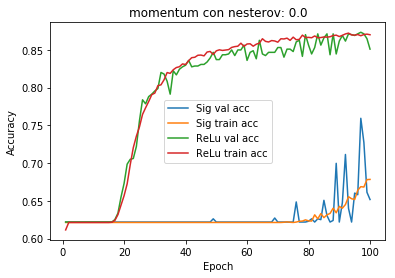

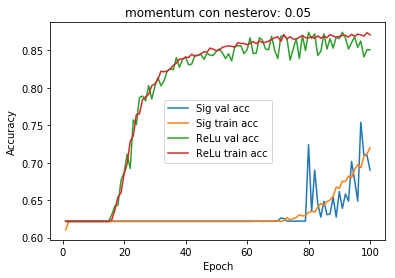

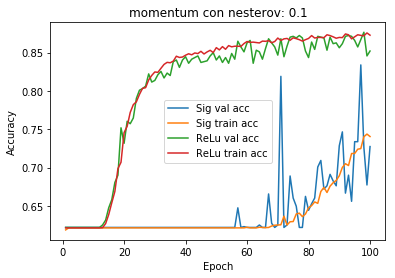

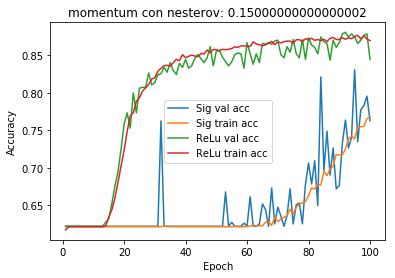

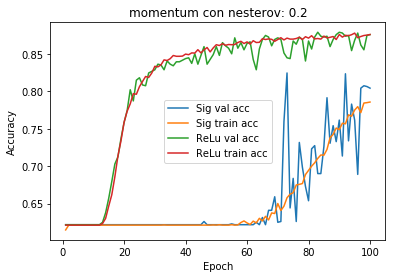

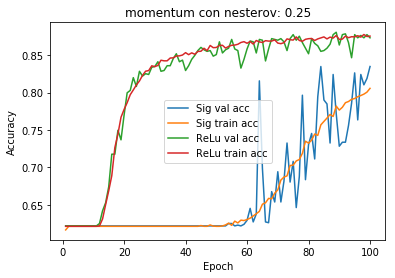

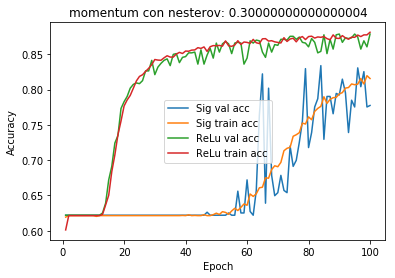

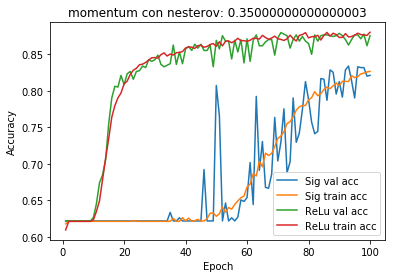

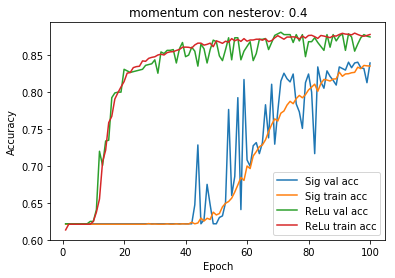

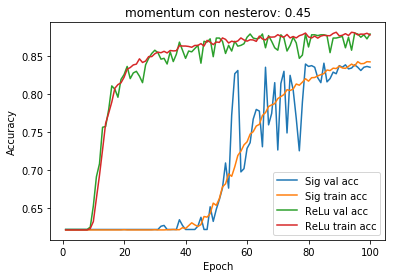

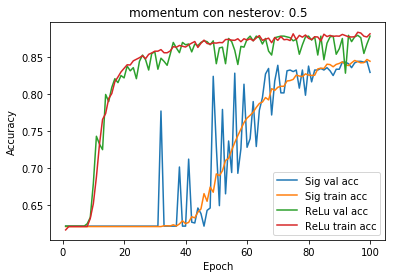

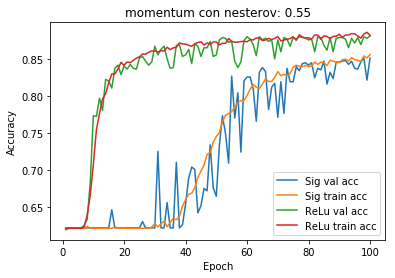

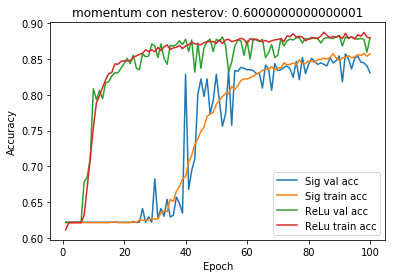

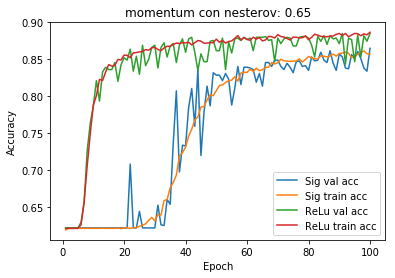

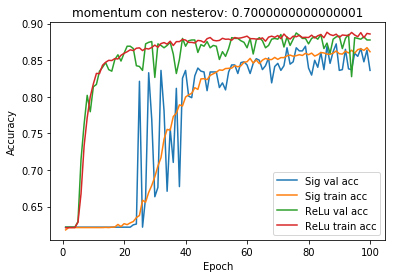

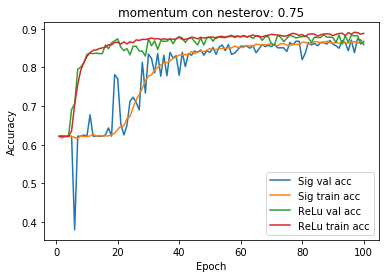

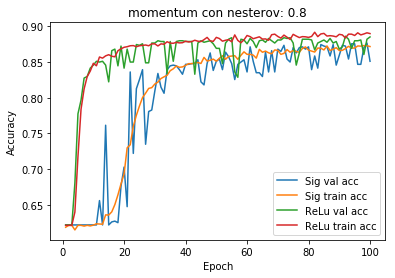

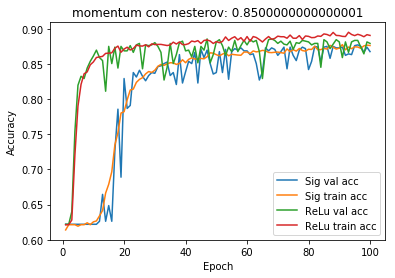

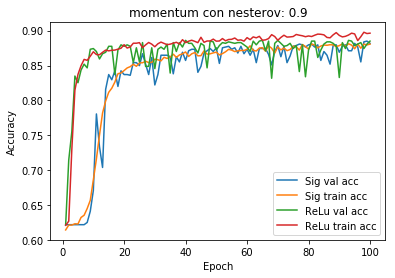

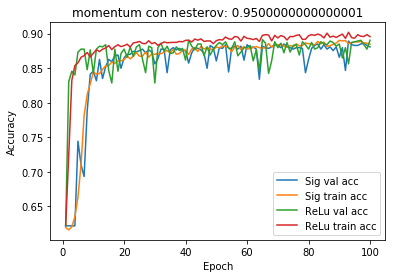

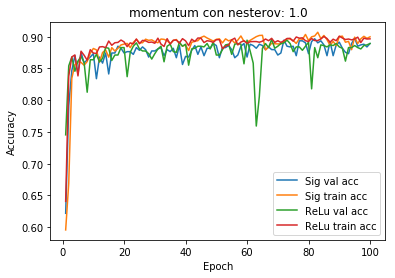

In [15]:
for m in momentum:    
    plt.plot(np.arange(1,101,1), con_nest['rango_sig'+str(m)].history['val_acc'])
    plt.plot(np.arange(1,101,1), con_nest['rango_sig'+str(m)].history['acc'])
    plt.plot(np.arange(1,101,1), con_nest['rango_relu'+str(m)].history['val_acc'])
    plt.plot(np.arange(1,101,1), con_nest['rango_relu'+str(m)].history['acc'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Sig val acc','Sig train acc','ReLu val acc','ReLu train acc'])
    plt.title('momentum con nesterov: '+str(m))
    plt.show()

In [16]:
from sklearn.metrics import f1_score
a=f1_score(y_test,model_sig4.predict_classes(X_test_scaled),average='weighted')
b=f1_score(y_test,model_relu4.predict_classes(X_test_scaled),average='weighted')
c=f1_score(y_test,model_sig5.predict_classes(X_test_scaled),average='weighted')
d=f1_score(y_test,model_relu5.predict_classes(X_test_scaled),average='weighted')
print('Momentum sin Nestervo')
print('ind_sig: ',ind_sig)
print('ind_re: ',ind_re)
print('Model Sigmoidal=',(a))
print('Model Relu=',(b))
print('Diferencia=',(a-b))

print('Momentum con Nestervo')
print('ind_sig: ',ind_sig)
print('ind_re: ',ind_re)
print('Model Sigmoidal=',(c))
print('Model Relu=',(d))
print('Diferencia=',(c-d))

Momentum sin Nestervo
ind_sig:  0.9500000000000001
ind_re:  0.9500000000000001
Model Sigmoidal= 0.8591258438846471
Model Relu= 0.20497035560220972
Diferencia= 0.6541554882824374
Momentum con Nestervo
ind_sig:  0.9500000000000001
ind_re:  0.9500000000000001
Model Sigmoidal= 0.8417089738384673
Model Relu= 0.5757603972975605
Diferencia= 0.26594857654090687


El uso de momentos ya sea con o sin el metodo de gradientes acelerados de nesterov, aumenta la velocidad de convergencia notoriamente de ambos modelos.  La precición de Relu llega a resultados similares con todos los momentos, pero es el modelo con función de activación sigmoidal el que más se beneficia de la aceleración de sus momentos.

Con los resultados de esta ocación, el mejor puntaje es con un momento de 0,95 en ambos casos, pero el modelo sigmoidal el que da mejor resultados, 0.85 y 0.84, vs Relu con 0.65 y 0.57, Nuevamente el mal resultado de Relu se puede deber a que no se elije el ajuste adecuado. 
Se puede apreciar con el momento NAG se logra una convergencía sutilmente más rápida que sin Nag.

> g) Vuelva a entrenar los modelos considerados en c) utilizando SGD en mini-*batches*. Experimente con diferentes tamaños del *batch*. Comente sobre eficacia de convergencia (converge en menor número de *epochs*) *vs* eficiencia computacional (tiempo en converger o por *epoch*).

In [17]:
#BATCHES

Rel= []
minrel = 0
ind_re = 0
Sig= []
min_sig = 0
ind_sig = 0

n_batches = 21
batch_sizes = np.round(np.linspace(1,X_train_scaled.shape[0],n_batches))
batch={}
for k in batch_sizes:
    model=Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1],kernel_initializer='uniform', activation="sigmoid"))
    model.add(Dense(1,kernel_initializer='uniform', activation="sigmoid")) #this should be mantained
    model.compile(optimizer=SGD(lr=0.01),loss='binary_crossentropy',metrics = ['accuracy'])
    hist = model.fit(X_train_scaled, y_train, batch_size=int(k), epochs=100, verbose=1, validation_data=(X_val_scaled, y_val))
    batch['batch_sig'+str(k)]=hist
    
    
    model=Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1],kernel_initializer='uniform', activation="relu"))
    model.add(Dense(1,kernel_initializer='uniform', activation="sigmoid")) #this should be mantained
    model.compile(optimizer=SGD(lr=0.01),loss='binary_crossentropy',metrics = ['accuracy'])
    hist = model.fit(X_train_scaled,y_train,batch_size=int(k),epochs=100,validation_data=(X_val_scaled, y_val))
    batch['batch_relu'+str(k)]=hist
    
    Rel.append(batch['batch_relu'+str(k)].history['val_loss'][99])
    minrel=min(Rel)
    if minrel == batch['batch_relu'+str(k)].history['val_loss'][99]:
        ind_re = m
        
    Sig.append(batch['batch_sig'+str(k)].history['val_loss'][99])
    min_sig=min(Sig)
    if min_sig == batch['batch_sig'+str(k)].history['val_loss'][99]:
        ind_sig = m
    
print(min(Sig))
print(ind_sig)
print(min(Rel))
print(ind_re)

model_sig6 = Sequential()
model_sig6.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model_sig6.add(Dense(1, kernel_initializer='uniform',activation="sigmoid")) #this should be mantained
    

model_relu6 =Sequential()
model_relu6.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model_relu6.add(Dense(1, kernel_initializer='uniform',activation="sigmoid")) #this should be mantained0

model_sig6.compile(optimizer=SGD(lr=0.01),loss='binary_crossentropy',metrics = ['accuracy'])
model_sig6.fit(X_train_scaled,y_train,batch_size=int(k),epochs=100,validation_data=(X_val_scaled, y_val))

model_relu6.compile(optimizer=SGD(lr=0.01),loss='binary_crossentropy',metrics = ['accuracy'])
model_sig6.fit(X_train_scaled,y_train,batch_size=int(k),epochs=100,validation_data=(X_val_scaled, y_val))  
             

Train on 3753 samples, validate on 939 samples
Epoch 1/100
3753/3753 [==============================] - 13s 4ms/step - loss: 0.7043 - acc: 0.5779 - val_loss: 0.7203 - val_acc: 0.6219
Epoch 2/100
3753/3753 [==============================] - 7s 2ms/step - loss: 0.6907 - acc: 0.5883 - val_loss: 0.6433 - val_acc: 0.6219
Epoch 3/100
3753/3753 [==============================] - 7s 2ms/step - loss: 0.6488 - acc: 0.6288 - val_loss: 0.5906 - val_acc: 0.7306
Epoch 4/100
3753/3753 [==============================] - 7s 2ms/step - loss: 0.5718 - acc: 0.7013 - val_loss: 0.6069 - val_acc: 0.6124
Epoch 5/100
3753/3753 [==============================] - 7s 2ms/step - loss: 0.4767 - acc: 0.7791 - val_loss: 0.4272 - val_acc: 0.8040
Epoch 6/100
3753/3753 [==============================] - 7s 2ms/step - loss: 0.4191 - acc: 0.8106 - val_loss: 0.3924 - val_acc: 0.8403
Epoch 7/100
3753/3753 [==============================] - 7s 2ms/step - loss: 0.3792 - acc: 0.8241 - val_loss: 0.3505 - val_acc: 0.8456
Epoch 8

In [18]:
batch_sizes

array([1.000e+00, 1.890e+02, 3.760e+02, 5.640e+02, 7.510e+02, 9.390e+02,
       1.127e+03, 1.314e+03, 1.502e+03, 1.689e+03, 1.877e+03, 2.065e+03,
       2.252e+03, 2.440e+03, 2.627e+03, 2.815e+03, 3.003e+03, 3.190e+03,
       3.378e+03, 3.565e+03, 3.753e+03])

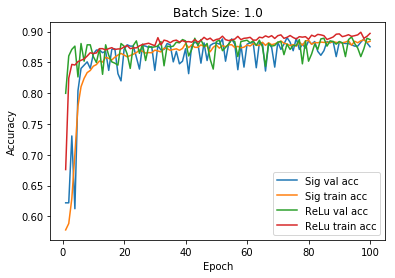

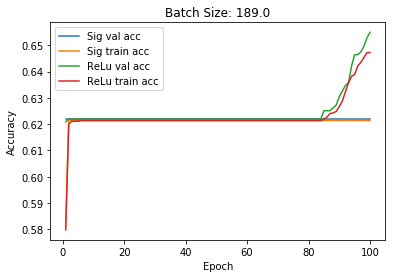

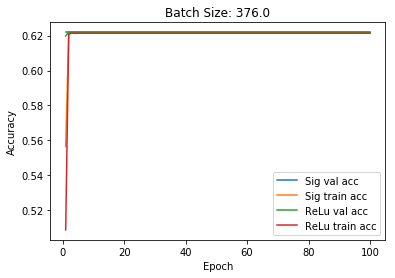

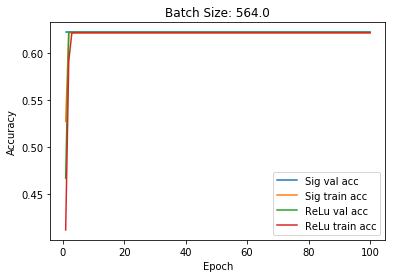

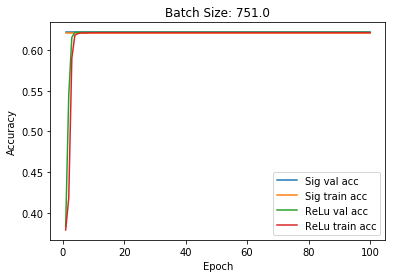

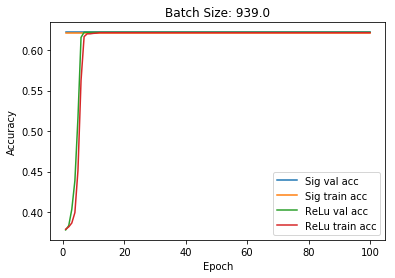

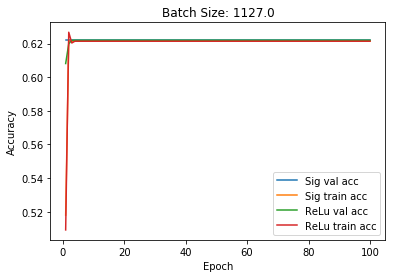

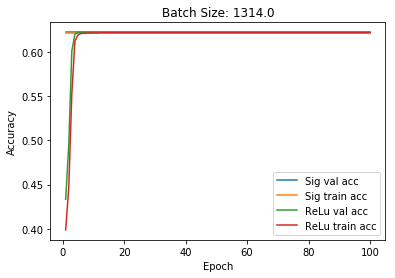

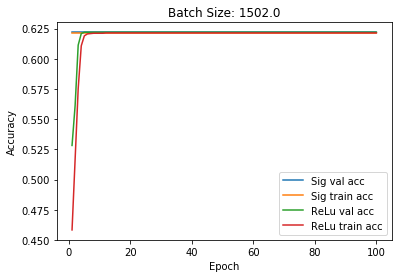

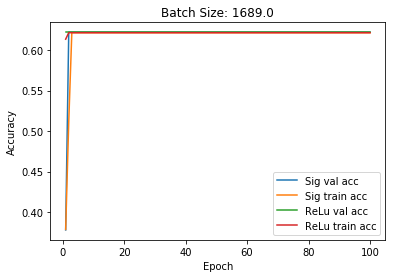

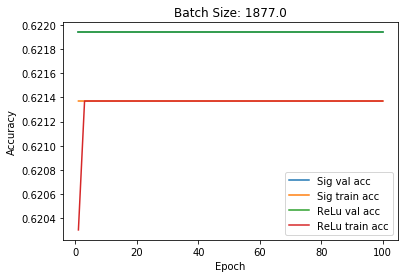

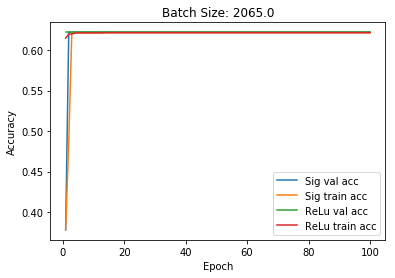

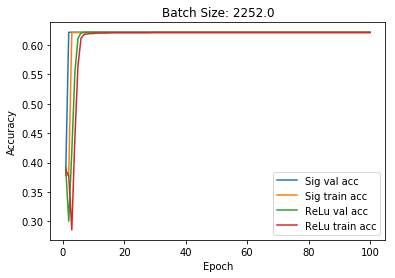

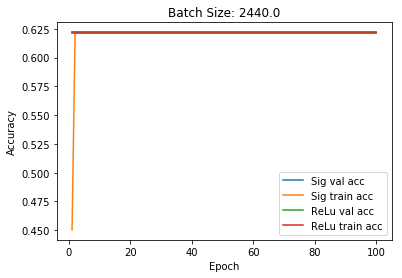

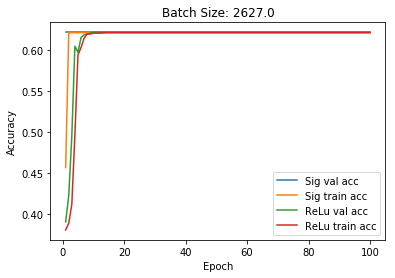

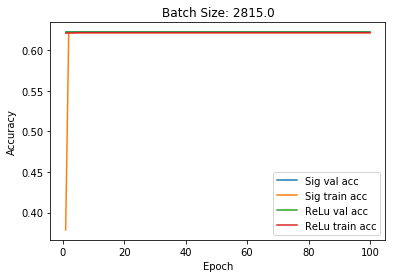

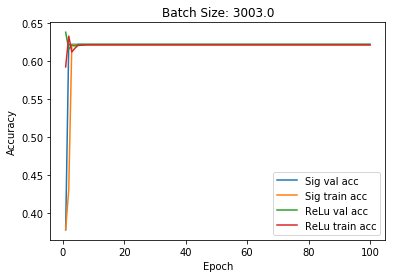

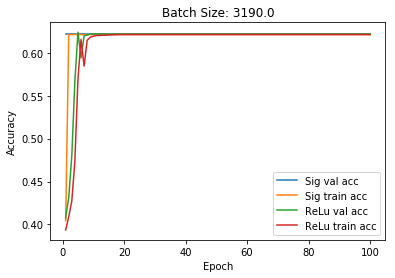

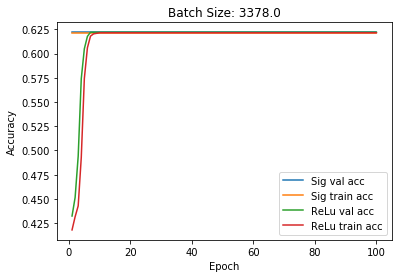

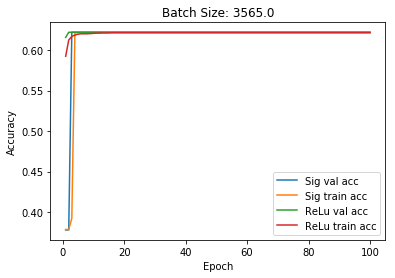

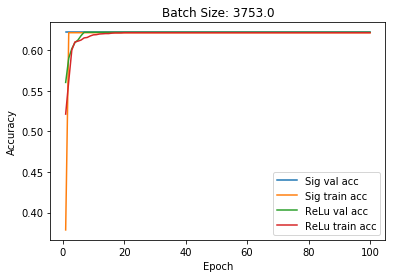

In [19]:
for m in batch_sizes:    
    plt.plot(np.arange(1,101,1), batch['batch_sig'+str(m)].history['val_acc'])
    plt.plot(np.arange(1,101,1), batch['batch_sig'+str(m)].history['acc'])
    plt.plot(np.arange(1,101,1), batch['batch_relu'+str(m)].history['val_acc'])
    plt.plot(np.arange(1,101,1), batch['batch_relu'+str(m)].history['acc'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Sig val acc','Sig train acc','ReLu val acc','ReLu train acc'])
    plt.title('Batch Size: '+str(m))
    plt.show()

In [20]:
a=f1_score(y_test,model_sig6.predict_classes(X_test_scaled),average='weighted')
b=f1_score(y_test,model_relu6.predict_classes(X_test_scaled),average='weighted')
print('Batch Sizes')
print('ind_sig: ',ind_sig)
print('ind_re: ',ind_re)
print('Model Sigmoidal=',(a))
print('Model Relu=',(b))
print('Diferencia=',(a-b))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Batch Sizes
ind_sig:  1.0
ind_re:  1.0
Model Sigmoidal= 0.5470135402403773
Model Relu= 0.5470135402403773
Diferencia= 0.0


Por defecto el modelo usa un batch size de 32, esto quiere decir que en todos los modelos anteriores, se han  eligido 32 datos por vez, se entrena una vez el modelo con estos y luego se actualizan los pesos. Al variar el tamaño de estos batch, cambia la velocidad de convergencia y más notorio aún, cambia la cantidad de epoch que se necesitan para que la red muestre resultados con su aprendizaje.
Los mejores tamaños parecen ser los menores a 1700 elementos.

Es extraño que cuando el batch size supera al tamaño de nuestro conjunto de validación no se observen cambios notorios en los gráficos de precición. Uno esperaría que a partir de cierto tamaño todos los gráficos se pareciera.


El batch size optimo no debería ser 1. 

> h) Entrene los modelos obtenidos en c) utilizando estrategias modernas para adaptar la tasa de aprendizaje. Compare los desempeños de *adagrad, adadelta, RMSprop* y *adam*, ofrecidos en __[keras optimizer](https://keras.io/optimizers/)__. ¿Se observa en algún caso un mejor resultado final? ¿Se observa en algún caso una mayor velocidad de convergencia sobre el dataset de entrenamiento? ¿Sobre el dataset de validación?

In [0]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
#moptimizer = Adagrad(lr=0.01)
#model.compile(optimizer=moptimizer)
#model.fit(X_train_scaled,y_train,batch_size=bs,epochs=100,validation_data=(X_val_scaled, y_val))

In [22]:
optis=('SGD', 'Adam', 'RMSprop', 'Adagrad', 'Adadelta')
optis

('SGD', 'Adam', 'RMSprop', 'Adagrad', 'Adadelta')

In [23]:
#Optimizadores
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta

Rel= []
minrel = 0
ind_re = 0
Sig= []
min_sig = 0
ind_sig = 0


opt={}
for k in optis:
    model=Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1],kernel_initializer='uniform', activation="sigmoid"))
    model.add(Dense(1,kernel_initializer='uniform', activation="sigmoid")) #this should be mantained
    model.compile(optimizer=k,loss='binary_crossentropy',metrics = ['accuracy'])
    hist = model.fit(X_train_scaled, y_train, epochs=100, verbose=1, validation_data=(X_val_scaled, y_val))
    opt['opt_sig'+str(k)]=hist
    
    
    model=Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1],kernel_initializer='uniform', activation="relu"))
    model.add(Dense(1,kernel_initializer='uniform', activation="sigmoid")) #this should be mantained
    model.compile(optimizer=k,loss='binary_crossentropy',metrics = ['accuracy'])
    hist = model.fit(X_train_scaled,y_train,epochs=100,validation_data=(X_val_scaled, y_val))
    opt['opt_relu'+str(k)]=hist
    
    Rel.append(opt['opt_relu'+str(k)].history['val_loss'][99])
    minrel=min(Rel)
    if minrel == opt['opt_relu'+str(k)].history['val_loss'][99]:
        ind_re = k        
    Sig.append(opt['opt_sig'+str(k)].history['val_loss'][99])
    min_sig=min(Sig)
    if min_sig == opt['opt_sig'+str(k)].history['val_loss'][99]:
        ind_sig = k
    
print(min(Sig))
print(ind_sig)
print(min(Rel))
print(ind_re)

model_sig7 = Sequential()
model_sig7.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model_sig7.add(Dense(1, kernel_initializer='uniform',activation="sigmoid")) #this should be mantained
    

model_relu7 =Sequential()
model_relu7.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model_relu7.add(Dense(1, kernel_initializer='uniform',activation="sigmoid")) #this should be mantained0

model_sig7.compile(optimizer=ind_sig,loss='binary_crossentropy',metrics = ['accuracy'])
model_sig7.fit(X_train_scaled,y_train,epochs=100,validation_data=(X_val_scaled, y_val))

model_relu7.compile(optimizer=ind_re,loss='binary_crossentropy',metrics = ['accuracy'])
model_sig7.fit(X_train_scaled,y_train,epochs=100,validation_data=(X_val_scaled, y_val))  

Train on 3753 samples, validate on 939 samples
Epoch 1/100
3753/3753 [==============================] - 8s 2ms/step - loss: 0.6665 - acc: 0.6182 - val_loss: 0.6634 - val_acc: 0.6219
Epoch 2/100
3753/3753 [==============================] - 0s 80us/step - loss: 0.6645 - acc: 0.6214 - val_loss: 0.6648 - val_acc: 0.6219
Epoch 3/100
3753/3753 [==============================] - 0s 79us/step - loss: 0.6654 - acc: 0.6214 - val_loss: 0.6678 - val_acc: 0.6219
Epoch 4/100
3753/3753 [==============================] - 0s 80us/step - loss: 0.6645 - acc: 0.6214 - val_loss: 0.6634 - val_acc: 0.6219
Epoch 5/100
3753/3753 [==============================] - 0s 81us/step - loss: 0.6643 - acc: 0.6214 - val_loss: 0.6686 - val_acc: 0.6219
Epoch 6/100
3753/3753 [==============================] - 0s 80us/step - loss: 0.6641 - acc: 0.6214 - val_loss: 0.6628 - val_acc: 0.6219
Epoch 7/100
3753/3753 [==============================] - 0s 79us/step - loss: 0.6640 - acc: 0.6214 - val_loss: 0.6635 - val_acc: 0.6219
Ep

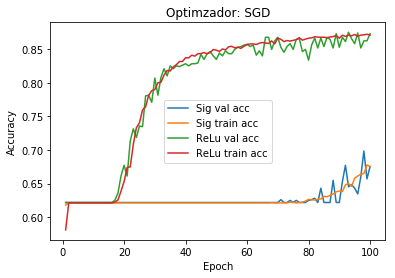

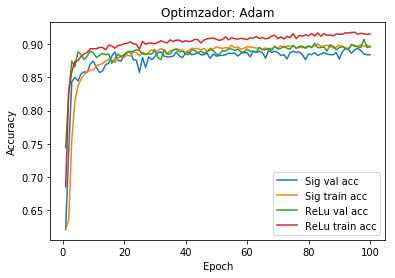

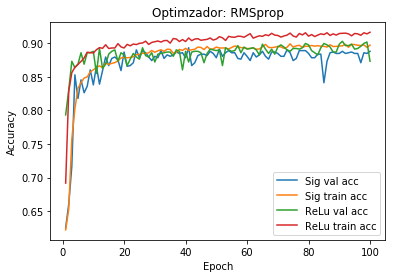

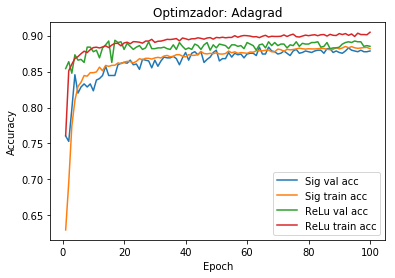

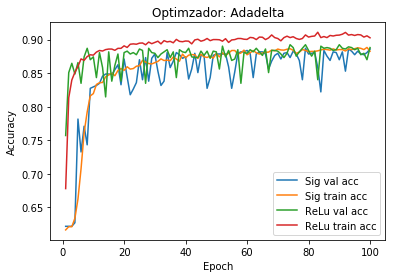

In [24]:
 for m in optis:    
    plt.plot(np.arange(1,101,1), opt['opt_sig'+str(m)].history['val_acc'])
    plt.plot(np.arange(1,101,1), opt['opt_sig'+str(m)].history['acc'])
    plt.plot(np.arange(1,101,1), opt['opt_relu'+str(m)].history['val_acc'])
    plt.plot(np.arange(1,101,1), opt['opt_relu'+str(m)].history['acc'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Sig val acc','Sig train acc','ReLu val acc','ReLu train acc'])
    plt.title('Optimzador: '+str(m))
    plt.show()

In [25]:
a=f1_score(y_test,model_sig7.predict_classes(X_test_scaled),average='weighted')
b=f1_score(y_test,model_relu7.predict_classes(X_test_scaled),average='weighted')
print('Optimzador ')
print('ind_sig: ',ind_sig)
print('ind_re: ',ind_re)
print('Model Sigmoidal=',(a))
print('Model Relu=',(b))
print('Diferencia=',(a-b))

Optimzador 
ind_sig:  Adam
ind_re:  Adam
Model Sigmoidal= 0.8697358903131562
Model Relu= 0.15744470682656542
Diferencia= 0.7122911834865908


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


> i) Entrene los modelos obtenidos en c) utilizando regularizadores clásicos $l_1$ y $l_2$ (*weight decay*). Compare los desempeños de prueba obtenidos antes y después de regularizar. Experimente con distintos valores del parámetro de regularización y comente. Además evalúe el efecto de regularizar solo la primera capa *vs* la segunda, comente. *Recuerde que la regularización se debe añadir a cada capa separadamente* ¿Dónde le parece más importante aplicar?

> j) Elija uno de los dos modelos definidos en c) y experimente con modificar la función objetivo, que hasta ahora se lo hemos dejado a keras definir la típica *binary cross entropy*, en pos de algún objetivo que decida plantearse, por ejemplo aumentar la velocidad de convergencia (reducir más rápida la función objetivo), obtener mejor desempeño en *f1 score* u algún otro.  
*Se dejan algunos ejemplos*